# Exploring Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
import seaborn as sns
from sklearn.mixture import GaussianMixture

In [2]:
df=pd.read_csv(r"D:\Internships\Feynn Labs\Project 2\CaseStudy\mcdonalds.csv")

In [3]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [4]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
df.shape

(1453, 15)

In [6]:
MD_x = df.iloc[:, 0:11].values

In [7]:
MD_x = (MD_x == "Yes").astype(int)

In [8]:
col_means = np.round(np.mean(MD_x, axis=0), 2)

In [9]:
print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [10]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)
explained_variance_ratio = pca.explained_variance_ratio_

In [11]:
print(explained_variance_ratio)

[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


In [12]:
pca_summary = pd.DataFrame(data=MD_pca, columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)])

# Print the formatted PCA summary
pd.set_option("display.precision", 1)  # Set the precision to 1 decimal place
print(pca_summary)

      PC1      PC2      PC3      PC4      PC5      PC6      PC7      PC8  \
0     0.4 -2.2e-01  6.6e-01 -4.0e-01  2.0e-01 -3.9e-01 -2.1e-01  1.6e-01   
1    -0.2  3.9e-01 -7.3e-01 -9.5e-02  4.5e-02 -8.7e-02 -9.6e-02 -3.5e-02   
2     0.4  7.3e-01 -1.2e-01  6.9e-01  8.4e-01 -6.9e-01  5.8e-01  3.6e-01   
3    -0.2 -3.5e-01 -8.4e-01  2.1e-01 -6.8e-01 -3.6e-02 -5.4e-02 -2.3e-01   
4     0.2 -8.1e-01  2.9e-02  5.5e-01  8.5e-01 -9.7e-02 -4.6e-01  1.7e-01   
...   ...      ...      ...      ...      ...      ...      ...      ...   
1448  1.6  2.8e-01 -1.4e-02  2.0e-01 -1.5e-01  3.1e-01 -7.5e-02  3.5e-01   
1449 -1.0  1.4e-02  3.0e-01  4.4e-01 -1.3e-01  3.8e-01 -3.3e-01  8.8e-01   
1450 -0.2  1.1e+00  2.2e-01 -4.7e-01 -1.9e-01 -1.9e-01 -9.2e-02 -3.7e-02   
1451 -1.2 -3.9e-02  5.6e-01  7.0e-01  4.8e-02  1.9e-01 -2.7e-02 -3.4e-01   
1452  1.6  2.8e-01 -1.4e-02  2.0e-01 -1.5e-01  3.1e-01 -7.5e-02  3.5e-01   

          PC9     PC10     PC11  
0     1.8e-01  5.2e-01 -5.7e-01  
1     1.1e-01  4.9e

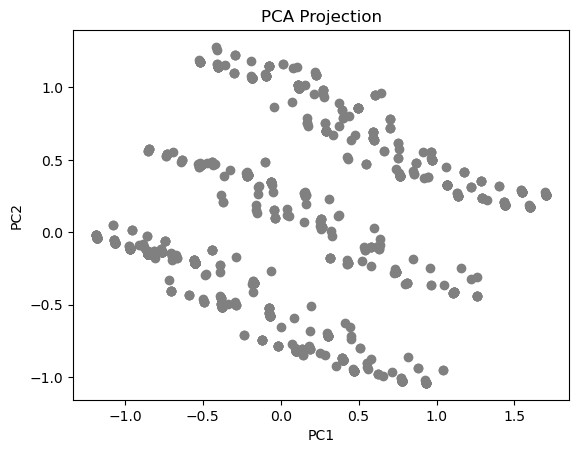

In [13]:
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c="grey")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")
plt.show()

# Extracting Segments using K-means

In [14]:
np.random.seed(1234)  # Set the random seed

# MD.x is the matrix of data obtained from previous steps

# Perform K-means clustering
cluster_labels = []
k_values = range(2, 9)  # Range of k values from 2 to 8
n_rep = 10  # Number of repetitions
verbose = False

for k in k_values:
    best_score = np.inf
    best_labels = None
    
    for _ in range(n_rep):
        kmeans = KMeans(n_clusters=k)
        labels = kmeans.fit_predict(MD_x)
        score = kmeans.inertia_
        
        if score < best_score:
            best_score = score
            best_labels = labels
    
    cluster_labels.append(best_labels)

# Relabel clusters
relabel_cluster_labels = []
for labels in cluster_labels:
    unique_labels = np.unique(labels)
    relabel_map = {label: i for i, label in enumerate(unique_labels)}
    relabeled_labels = [relabel_map[label] for label in labels]
    relabel_cluster_labels.append(relabeled_labels)


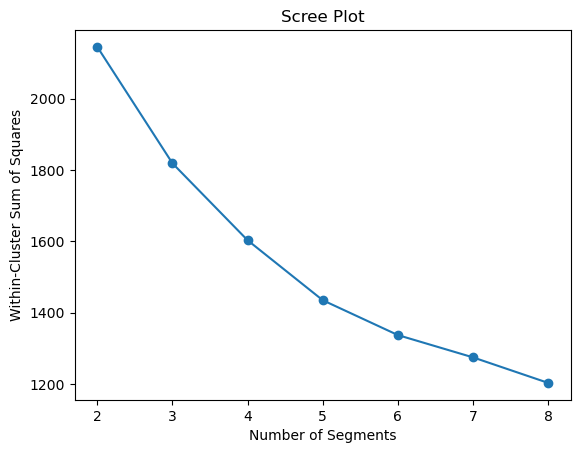

In [15]:
x_values = range(2, 9)  # Range of k values from 2 to 8

# Calculate within-cluster sum of squares (WCSS)
wcss = [KMeans(n_clusters=k).fit(MD_x).inertia_ for k in x_values]

# Create scree plot
plt.plot(x_values, wcss, marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("Within-Cluster Sum of Squares")
plt.title("Scree Plot")
plt.show()

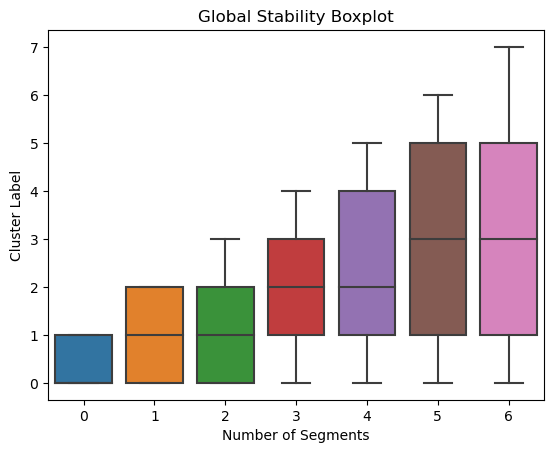

In [16]:
np.random.seed(1234)  # Set the random seed

# MD.x is the matrix of data obtained from previous steps

# Perform bootstrapped K-means clustering
cluster_labels = []
k_values = range(2, 9)  # Range of k values from 2 to 8
n_rep = 10  # Number of repetitions
n_boot = 100  # Number of bootstrap samples

for k in k_values:
    boot_labels = []
    
    for _ in range(n_boot):
        boot_data = resample(MD_x)
        kmeans = KMeans(n_clusters=k)
        labels = kmeans.fit_predict(boot_data)
        boot_labels.append(labels)
    
    cluster_labels.append(boot_labels)

# Create global stability boxplot
fig, ax = plt.subplots()
ax = sns.boxplot(data=cluster_labels)
ax.set_xlabel("Number of Segments")
ax.set_ylabel("Cluster Label")
ax.set_title("Global Stability Boxplot")
plt.show()


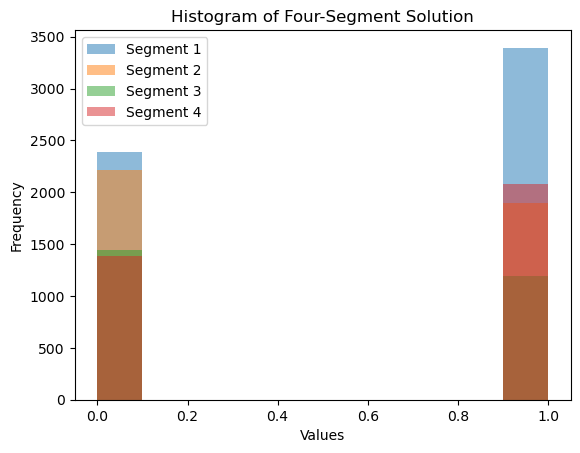

In [17]:
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=1234)
labels = kmeans.fit_predict(MD_x)

# Create histogram plot
segment_1 = MD_x[labels == 0]
segment_2 = MD_x[labels == 1]
segment_3 = MD_x[labels == 2]
segment_4 = MD_x[labels == 3]

# Set the number of bins and the range for the histogram
bins = np.linspace(0, 1, 11)

plt.hist(segment_1.flatten(), bins=bins, alpha=0.5, label="Segment 1")
plt.hist(segment_2.flatten(), bins=bins, alpha=0.5, label="Segment 2")
plt.hist(segment_3.flatten(), bins=bins, alpha=0.5, label="Segment 3")
plt.hist(segment_4.flatten(), bins=bins, alpha=0.5, label="Segment 4")

plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of Four-Segment Solution")
plt.legend()
plt.show()
